In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [18]:
# Prepare the Data
X = df.drop('variety', axis=1)  # Features
y = df['variety']  # Target variable

In [19]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [21]:
# Preprocess Categorical Data (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

In [22]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Making Predictions
y_pred = clf.predict(X_test)

In [25]:
print("Number of features in X_train:", len(X_train.columns))
print("Number of features in X_test:", len(X_test.columns))

Number of features in X_train: 4
Number of features in X_test: 4


In [26]:
print("Feature names:", X_train.columns)

Feature names: Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')


In [27]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
feature_names = X.columns.tolist()


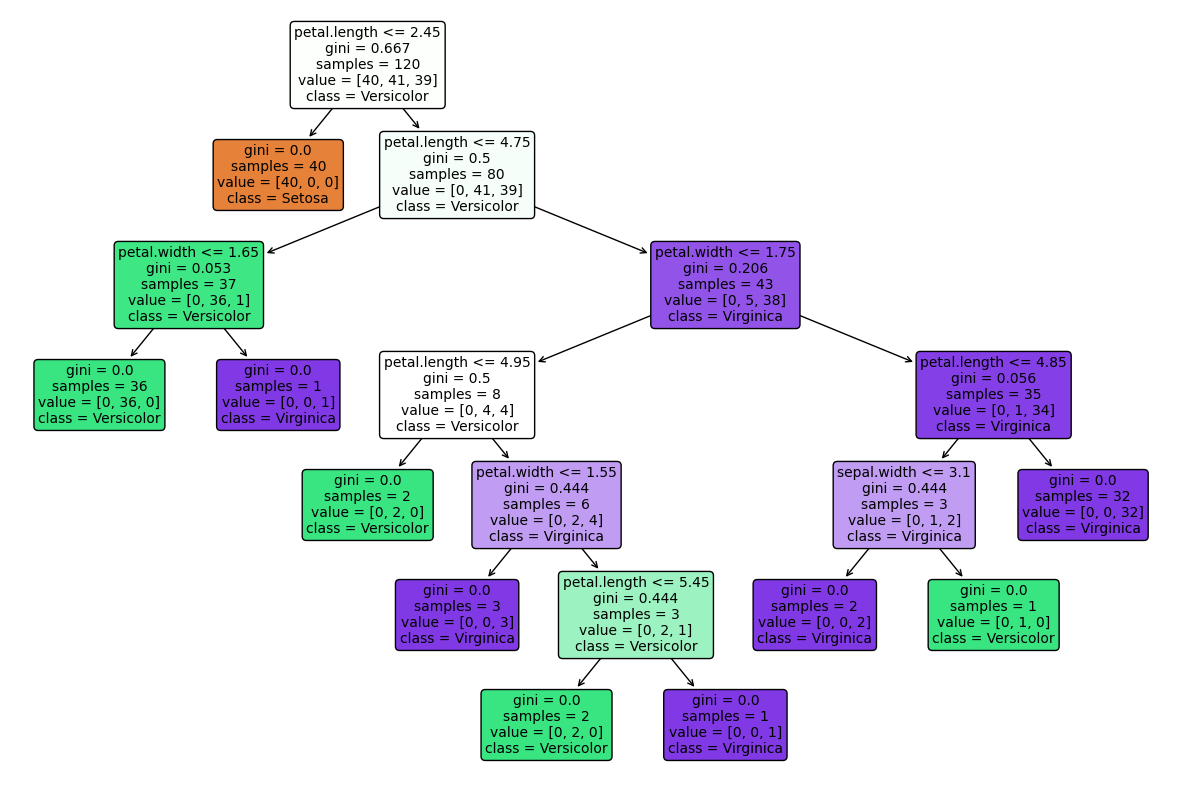

In [39]:
# Convert the NumPy array to a Python list
class_names = df['variety'].unique().tolist()

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
plt.show()


<h6><b>Inference :</b> <i>

>*  <u>Accuracy</u> : The accuracy of 1.00 indicates that the model correctly predicted all instances in the test set. The accuracy is perfect (1.00 or 100%), meaning there are no misclassifications.
*   <u>Confusion Matrix</u> : The rows of the confusion matrix represent the Actual classes (Setosa, Versicolor, Virginica) where as the columns represent the Predicted classes. Also each element (i, j) in the matrix represents the number of instances where the true class was i and the model predicted class j. In this case, there are no misclassifications, i.e., All instances are correctly classified according to the diagonal elements.
*   <u>Classification Report</u> : The precision for each class is 1.00, meaning there are no false positives for any class. The recall for each class is 1.00, meaning there are no false negatives for any class.The F1-score for each class is 1.00, indicating perfect balance. Support shows the number of actual occurrences of the class in the specified dataset.
<br>
In summary, the model is performing exceptionally well on the given test set, with no misclassifications across different classes. It's an ideal scenario where the model achieves perfect accuracy and generalizes well to the test data.
</i></h6>